# **Colab ব্যবহারকারীদের জন্য নোট**

# **সরাসরি এই ফাইলে কিছু লিখবেন না—আপনার কাজ হারিয়ে যেতে পারে!**

# **শুরু করার আগে অবশ্যই একটি কপি করুন।**

কিভাবে কপি করবেন

1. উপরের বাম দিকের "File" ক্লিক করুন।  
> *যদি হেডার (যেমন “File” বা "Runtime") না পান, উপরের ডানদিকের “v” মার্ক ক্লিক করে দেখুন।*

2. "Save a copy in Drive" বেছে নিন।

3. কপি করা ফাইলের নাম পরিবর্তন করে রাখুন “YOURNAMEs\_FileName.ipynb”।  
> উদাহরণ: আপনার নাম যদি Olivia হয়, তাহলে Olivias_FileName.ipynb

4. আপনার runtime সেট করুন **CPU**-তে। T4 GPU CPU থেকে বেশি বার সেশন রিসেট করে।<br>  
সুতরাং, GPU প্রয়োজন না হলে CPU runtime ব্যবহার করাই ভালো।<br>  
এই [ভিডিওটি](https://youtu.be/XRmI-qRiFFw) দেখে নিতে পারেন।<br>  

> যদি মাঝপথে runtime পরিবর্তন করেন, তাহলে শুরু থেকে সব সেল আবার চালাতে হবে।<br>  
> কাজ শুরুর আগে runtime ঠিক করে নিন।<br>  
> *সেল আবার চালানোর জন্য: “Runtime” (উপর বামে) ক্লিক করুন → তারপর “Run before” চাপুন।*<br>  

---

* চেকমার্ক (✅) সংরক্ষিত হয় না। Chrome এর রিফ্রেশ বোতাম দিয়ে পেজ রিলোড করলে তা মুছে যাবে।<br>  
পজ দিয়ে পরে ফিরে আসতে চাইলে শুধু একটি টেক্সট সেল করে লিখে রাখুন “SO FAR DONE.”

---

* Colab-এ **আগের আউটপুট ৩০ থেকে ৯০ মিনিটে একবার রিসেট হয়।**<br>  
  এজন্য `~~ is not defined` ধরনের এরর খুবই ঘন ঘন দেখা দেয়।

  🔁 `~~is not defined` এরর পেলে কী করবেন  
  1. প্রথমে দেখুন আপনার ভেরিয়েবল নাম ঠিক আছে কি না।<br>  
  2. নাম ঠিক থাকলেও এরর দেখাচ্ছে, তাহলে **যে সেলটি রিস্টার্ট করতে চান তা ক্লিক করুন**।<br>  
  3. “Runtime” (উপর বামে) যান → “Run before” চাপুন।<br>  
    → এতে **সকল আগের সেল আবার রান হবে**।  
  4. সেলটি আবার চালান।

  যদি এরপরও এরর থাকে,<br>  
  তাহলে আগের সেলগুলোর TODO উত্তরগুলিতে হয়তো কোনো ভুল আছে।<br>  
  উত্তরের সঠিকতা যাচাই করুন।<br>  
  অথবা ChatGPT বা অন্য কোনও কোডিং সহায়তাকারীর সাহায্য নিন।

# **Preparation**

এই অংশটা শুধু আগের Chapter-এর কন্টেন্ট লোড করে।<br>
কোড রান করলেই হয়—পড়ার দরকার নেই।<br>
চলতে থাকো, এগিয়ে যাওয়ার কোন বাধা নেই।<br>

In [ ]:
# ফাইল ডাউনলোড করুন
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# আপনি যা ডাউনলোড করেছেন সেই input.text ফাইলটি utf-8 এ লোড করুন।
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# টেনসর সুন্দরভাবে প্রদর্শনের জন্য একটি ফাংশন (এটি এড়িয়ে যেতে পারেন)
import torch
import torch.nn as nn
import torch.nn.functional as F

def print_formatted_tensor(*args, width=6, decimals=2):
    """
    A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("name", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """

    # Determine tensor and name from arguments
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Convert Tensor to List
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """Formatting a recursively nested list and returning a string"""
        # If the contents are lists, then re-return
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # For numerical lists
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # Formatted string (bar brackets on outermost frames are removed)
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # Result output
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("tensor([")
    print(" " * 9 + inner_formatted)
    print(" " * 7 + "])")

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # শব্দকোষ নম্বর x এম্বেডিং মাত্রার জন্য একটি এম্বেডেড টেবিল নির্ধারণ করুন
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # ইনপুট ইনডেক্সের সাথে সংশ্লিষ্ট এমবেডেড ভেক্টর নিন
        return self.token_embedding_table.forward(input_indices)

# একটি পজিশন এমবেডেড মডিউল সংজ্ঞায়িত করা
class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length, embedding_dim):
        super().__init__()
        # অবস্থান এমবেডিং লেয়ার
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        sequence_length = input_indices.shape[1]  # ক্রমের দৈর্ঘ্য নিন
        position_indices = torch.arange(sequence_length, device=input_indices.device)  # অবস্থান সূচক তৈরি
        position_embeddings = self.position_embedding_layer(position_indices)  # অবস্থান এম্বেডিং
        return position_embeddings

class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # প্রতিটি টোকেনের জন্য এমবেডেড লেয়ার
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)

    def forward(self, input_indices):
        # টোকেন এমবেডিং পান
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # অবস্থান এম্বেডিং পান
        position_embeddings = self.position_embedding_layer.forward(input_indices)

        # টোকেন এম্বেডিং এবং পজিশন এম্বেডিং যোগ করা হচ্ছে
        embeddings = token_embeddings + position_embeddings
        return embeddings

class AttentionHead(nn.Module):
    def __init__(self, head_size, config):
        super().__init__()
        self.key_fc= nn.Linear(config.embedding_dim, head_size, bias=False)
        self.query_fc = nn.Linear(config.embedding_dim, head_size, bias=False)
        self.value_fc = nn.Linear(config.embedding_dim, head_size, bias=False)

        # মাস্ক তৈরি করা হয় নিম্ন ত্রিভুজাকার ম্যাট্রিক্স ব্যবহার করে (self-attention এর কারণিকতা বজায় রেখে)
        self.register_buffer('tril', torch.tril(torch.ones(config.input_sequence_length, config.input_sequence_length)))

        # ড্রপআউট
        self.dropout = DeterministicDropout(config.dropout_rate)
        self.head_size = head_size

    def forward(self, input_tensor):
        B, T, C = input_tensor.shape  # ব্যাচ, টোকেন দৈর্ঘ্য, এমবেডিং চ্যানেল

        key = self.key_fc.forward(input_tensor)     # (বি, টি, হেড_সাইজ)
        query = self.query_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)
        value = self.value_fc.forward(input_tensor)   # (বি, টি, হেড_সাইজ)

        # অ্যাটেনশন স্কোর হিসাব করা হচ্ছে (QK^T) * self.head_size **(-0.5)
        attention_scores = query @ key.transpose(-2, -1) * self.head_size**(-0.5)

        # মাস্ক প্রয়োগ করা হয়েছে
        attention_scores = attention_scores.masked_fill(self.tril[:T, :T] == 0, float('-inf'))

        # সফটম্যাক্স → ড্রপআউট → ওয়েটেড সম
        attention_weights = F.softmax(attention_scores, dim=-1)
        attention_weights = self.dropout(attention_weights)
        out = attention_weights @ value  # (বি, টি, হেড_সাইজ)
        return out

class DeterministicDropout(nn.Module):
    def __init__(self, p=0.1, seed=199):
        super().__init__()
        self.p = p
        # একটি নির্দিষ্ট র্যান্ডম সংখ্যা জেনারেটর তৈরি করুন
        self.generator = torch.Generator()
        self.generator.manual_seed(seed)

    def forward(self, x):
        if self.training:
            # স্থির জেনারেটর ব্যবহার করে র্যান্ডম সংখ্যা তৈরি করুন
            mask = (torch.rand(x.shape, generator=self.generator, device=x.device, dtype=x.dtype) > self.p)
            return x * mask / (1 - self.p)
        else:
            return x

# ব্যবহারের উদাহরণসমূহ
dropout_layer = DeterministicDropout(p=0.1, seed=1337)
dropout_layer.train()  # ট্রেনিং মোডেও নির্দিষ্ট র‍্যান্ডম নম্বর ব্যবহার করা হয়

# মডেল সেটিংস সংরক্ষণ করার জন্য কনফিগারেশন ক্লাস
class ModelConfig:
    batch_size = 1  # একবারে প্রক্রিয়াজাত করার ডেটার সংখ্যা (ব্যাচ সাইজ)
    input_sequence_length = 8  # ইনপুট ডেটার দৈর্ঘ্য (সিকোয়েন্স দৈর্ঘ্য)
    embedding_dim = 8  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রা সংখ্যা)
    dropout_rate = 0.1  # ড্রপআউট সম্ভাবনা

torch.manual_seed(1337)

# ModelConfig ইনস্ট্যান্স তৈরি করা হচ্ছে। কোন কনফিগারেশন প্যারামিটার (কনস্ট্রাক্টর) নেই।
config = ModelConfig()
# head_size হিসাব করা হচ্ছে
num_heads = 2
head_size = int(config.embedding_dim / num_heads)

# একটি EmbeddingModule উদাহরণ তৈরি করা হচ্ছে।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
layer_norm = nn.LayerNorm(config.embedding_dim)
attention_head = AttentionHead(head_size = head_size, config = config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

embeddings = embedding_module.forward(sample_input_tokens)
norm_embeddings = layer_norm(embeddings)
attention_output1 = attention_head.forward(norm_embeddings)
print_formatted_tensor("অ্যাটেনশন আউটপুট1", attention_output1)

# Chapter 7: MultiHeadAttention

### Section 1: __init__

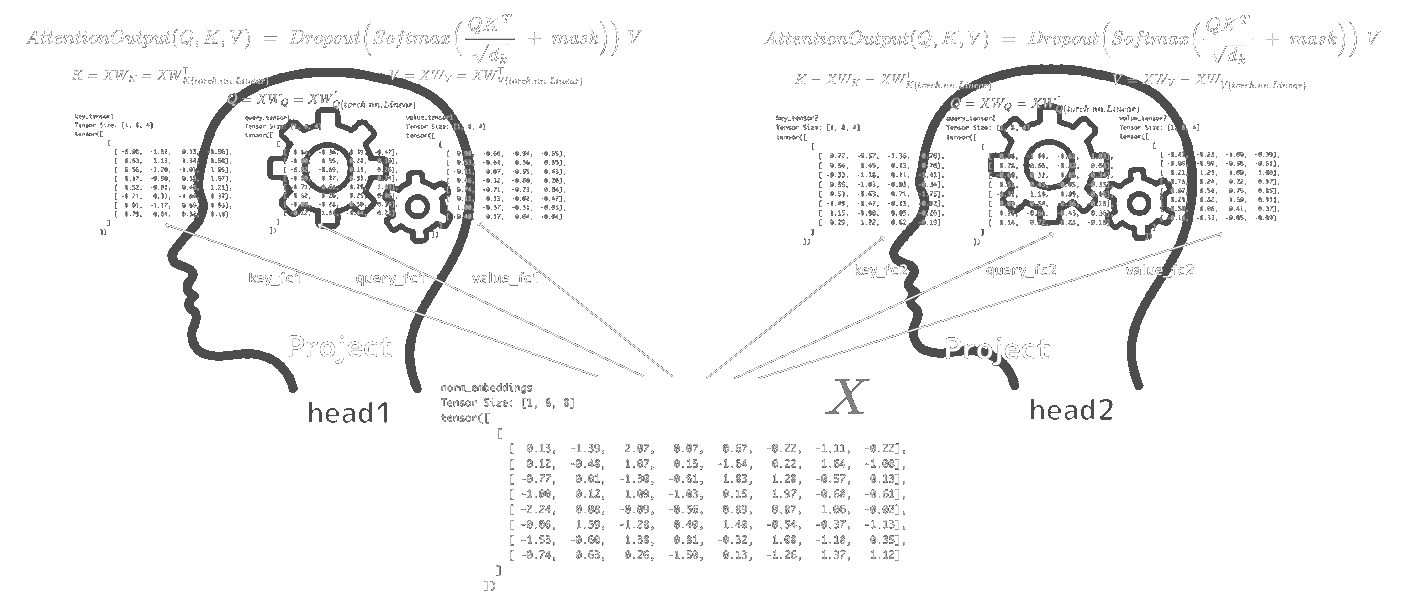

দ্বিতীয় Attention Head হিসাব করি।

In [ ]:
# নিচের কোড শুধু norm_embeddings হিসাব করে, তাই এ নিয়ে চিন্তা করার দরকার নেই।
torch.manual_seed(1337) # বীজ মান সমন্বয় করুন

# ModelConfig ইনস্ট্যান্স তৈরি করা হচ্ছে। কোন কনফিগারেশন প্যারামিটার নেই (কনস্ট্রাক্টর)।
config = ModelConfig()
# head_size হিসাব করা হচ্ছে
num_heads = 2
head_size = int(config.embedding_dim / num_heads)

# একটি EmbeddingModule উদাহরণ তৈরি করা হচ্ছে।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
layer_norm = nn.LayerNorm(config.embedding_dim)
attention_head1 = AttentionHead(head_size = head_size, config = config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

sample_embeddings = embedding_module.forward(sample_input_tokens)
norm_embeddings = layer_norm(sample_embeddings)

key_fc2 = # TODO: nn.Linear(ইনপুট মাত্রা, আউটপুট মাত্রা, বায়াস). config.embedding_dim ব্যবহার করুন।
key_tensor2 = # TODO: ইনস্ট্যান্সে মেথড প্রয়োগ করুন (আর্গুমেন্ট)
print_formatted_tensor("key_tensor2", key_tensor2)

query_fc2 = # TODO: nn.Linear(ইনপুট ডাইমেনশন, আউটপুট ডাইমেনশন, বায়াস)। config.embedding_dim ব্যবহার করুন।
query_tensor2 = # TODO: ইনস্ট্যান্সে মেথড (আর্গুমেন্ট) প্রয়োগ করুন
print_formatted_tensor("\nquery_tensor2", query_tensor2)

value_fc2 = # TODO: nn.Linear(ইনপুট ডাইমেনশন, আউটপুট ডাইমেনশন, বায়াস)। config.embedding_dim ব্যবহার করুন।
value_tensor2 = # TODO: ইনস্ট্যান্স ব্যবহার করুন। মেথড (আর্গুমেন্ট)
print_formatted_tensor("\nvalue_tensor2", value_tensor2)

projection = nn.Linear(8, 8) # আমি পরে এটি ব্যবহার করব

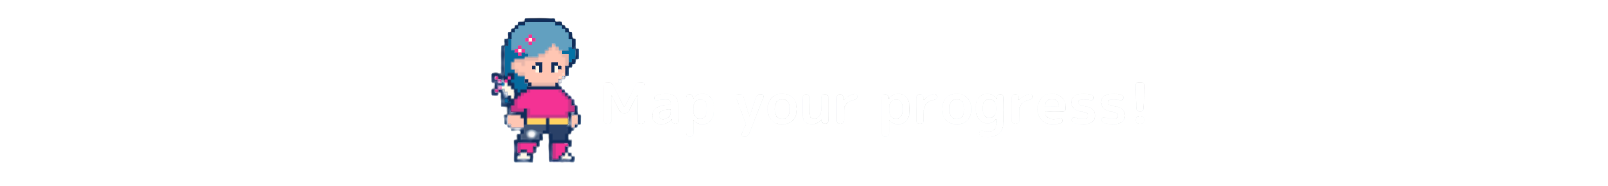

**Chapter 6: MultiHeadAttention Class: Section 1: __init__** <label><input type="checkbox"> Mark as Done</label>

### Section 2: forward

$$
{K^T}
$$

In [ ]:
key_transpose2 = key_tensor2.transpose(-2, -1)
print_formatted_tensor("key_transpose2", key_transpose2)

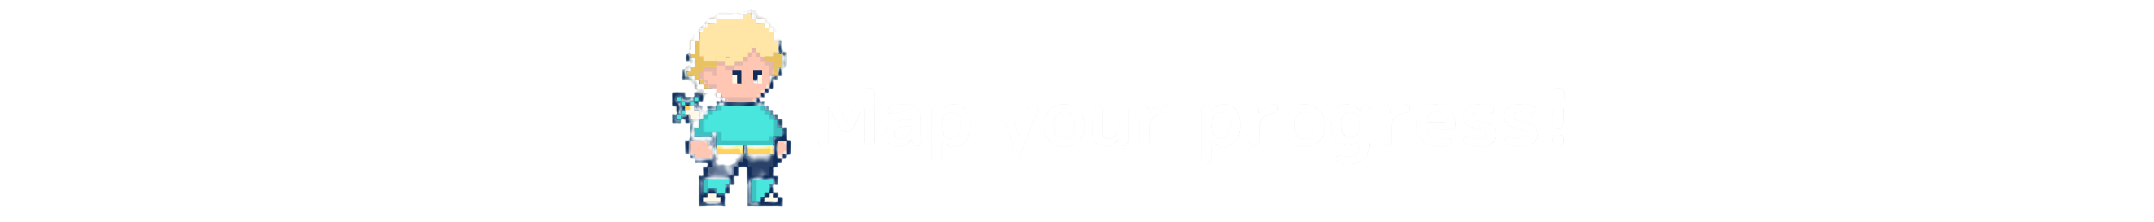

$$
\frac{K^T}{\sqrt{d_k}}
$$> এখানে $K^T$ মানে ট্রান্সপোজ করা ম্যাট্রিক্স $K$ এবং $d_k$ হলো কোনও ভেক্টরের দৈর্ঘ্য বা মাত্রা। সূত্রটা মূলত ম্যাট্রিক্স স্কেলিং করে, যেখানে $K^T$ কে $d_k$ এর বর্গমূল অনুযায়ী ভাগ করা হয়। এটা সাধারণত ডিপ লার্নিং-এ অ্যাটেনশন মেকানিজমে ব্যবহৃত হয়, যাতে বড় মানগুলো নিয়ন্ত্রণে রাখা যায় এবং গণনায় স্থিতিশীলতা আসে।

In [ ]:
embedding_dim = 8
num_heads = 2
head_size = int(embedding_dim / num_heads)
key_transpose_scaled2 = key_transpose2 * head_size ** (-0.5)
print_formatted_tensor("key_transpose_scaled2", key_transpose_scaled2)

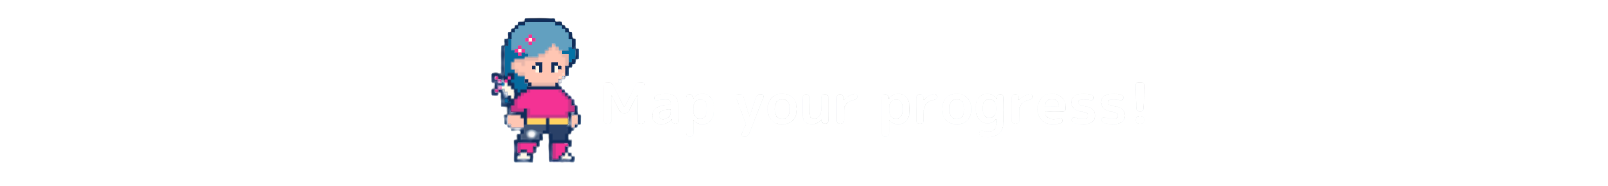

$$
\frac{Q\,K^T}{\sqrt{d_k}}
$$

এখানে,  $Q$ হচ্ছে কুয়েরি ম্যাট্রিক্স, $K^T$ হচ্ছে কি ম্যাট্রিক্সের ট্রান্সপোজ এবং $d_k$ হল কী ভেক্টরের মাত্রা। এই সূত্রটি self-attention মেকানিজমে স্কেলড ডট প্রোডাক্ট অ্যাটেনশন হিসাব করার জন্য ব্যবহৃত হয়। স্কেলিং হিসেবে  $\sqrt{d_k}$ দিয়ে ভাগ করার ফলে বড় মাত্রার ভেক্টরগুলো বেশি প্রভাব ফেলে না, যা গাণিতিক স্থিতিশীলতা বাড়ায়।

In [ ]:
attention_weights_before_mask2 = query_tensor2 @ key_transpose_scaled2
print_formatted_tensor("মাস্কের আগে অ্যাটেনশন ওজন2", attention_weights_before_mask2)

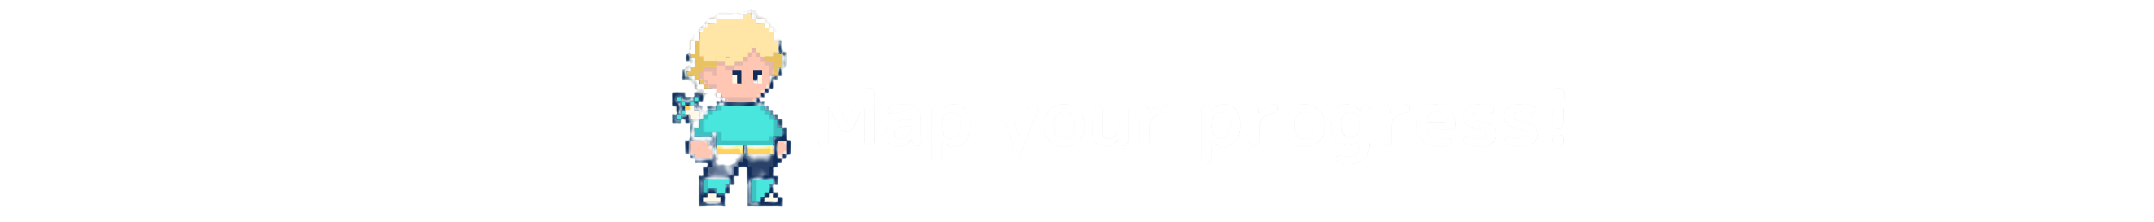

In [ ]:
mask = torch.triu(torch.ones(1, 8, 8), diagonal=1)
print_formatted_tensor("মাস্ক", mask)

$$
\frac{QK^{T}}{\sqrt{d_{k}}}
\;+\;
{mask}
$$

In [ ]:
attention_weights_masked2 = attention_weights_before_mask2.masked_fill(mask == 1, float('-inf'))
print_formatted_tensor("মনোযোগ_ওজন_মাস্ক_২", attention_weights_masked2)

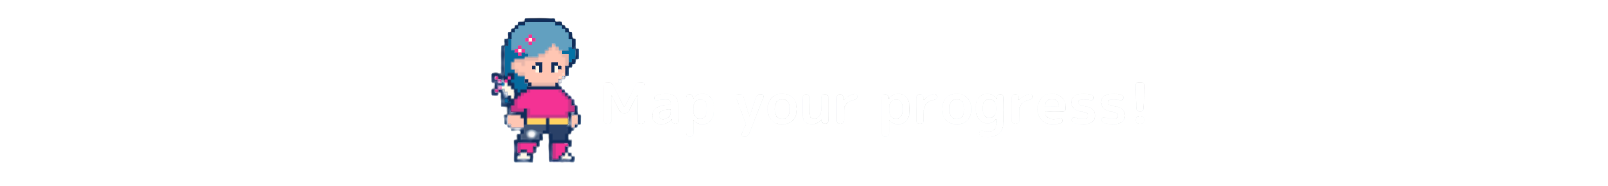

$$
{Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
$$

এখানে $Q$ হলো কোয়েরি ম্যাট্রিক্স, $K$ হলো কী ম্যাট্রিক্স, আর $d_k$ হলো কী ভেক্টরের ডাইমেনশন বা মাত্রা। সূত্রে $QK^{T}$ অর্থাৎ $Q$ ও $K$ এর ট্রান্সপোজড গুণফলকে $\sqrt{d_k}$ দিয়ে ভাগ করা হয়েছে; এটা স্কেলড ডট-প্রোডাক্ট অ্যাটেনশন। তারপর এখানে একটি $mask$ যোগ করা হয়েছে, যা অনেক সময় নির্দিষ্ট পজিশনগুলোকে নিষ্ক্রিয় করতে বা মনোযোগ সীমাবদ্ধ করতে কাজে লাগে। সবশেষে $Softmax$ ফাংশন প্রয়োগ করা হয়, যা প্রতিটি উপাদানের সাচ্ছন্দ্যপূর্ণ সামঞ্জস্য বের করে দেয়।

In [ ]:
attention_weights_softmax2 = F.softmax(attention_weights_masked2, dim=-1)
print_formatted_tensor("মনোযোগ ওজন_softmax2", attention_weights_softmax2)

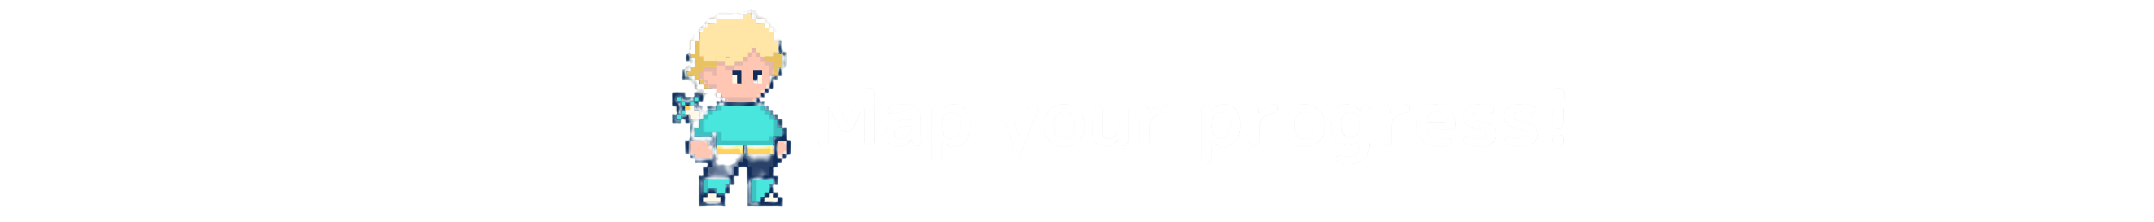

$$
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)
$$

এই সূত্রে $Q$ ও $K$ হলো Query এবং Key ম্যাট্রিক্স, $d_k$ হলো Key-এর ডাইমেনশন। প্রথমে $QK^{T}$ এর ফলাফল $d_k$ এর বর্গমূল দিয়ে ভাগ করা হয় যা স্কেলিং করে। তারপর $mask$ যোগ করা হয়, যা নির্দিষ্ট পজিশনগুলোতে আগ্রহ বা বাদ দেয়ার জন্য ব্যবহৃত হয়। শেষে Softmax ফাংশনের মাধ্যমে স্কোরগুলোর প্রোবাবিলিটি হিসাব করা হয় এবং Dropout প্রয়োগ করে অতিরিক্ত ওভারফিটিং কমানো হয়।

In [ ]:
dropout = DeterministicDropout()
attention_weights_dropout2 = dropout.forward(attention_weights_softmax2)
print_formatted_tensor("অ্যাটেনশন_ওয়েটস_ড্রপআউট2", attention_weights_dropout2)

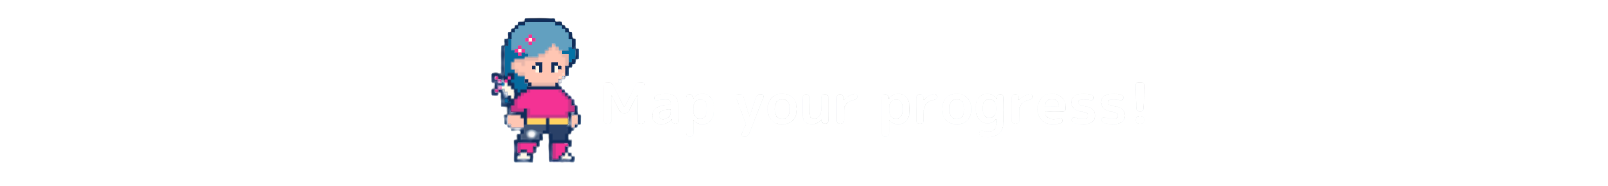

$$
{AttentionOutput}(Q, K, V)
\;=\;
{Dropout}\Bigl(
  {Softmax}\Bigl(
    \frac{QK^{T}}{\sqrt{d_{k}}}
    \;+\;
    {mask}
  \Bigr)
\Bigr)\;V
$$

In [ ]:
attention_output2= attention_weights_dropout2 @ value_tensor2
print_formatted_tensor("অ্যাটেনশন_আউটপুট2", attention_output2)

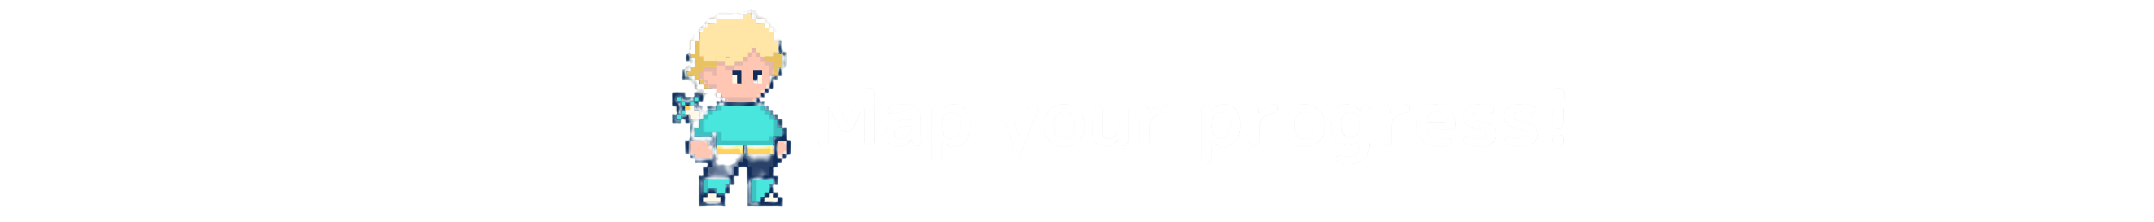

```python
Function: torch.cat  
Arguments: (attention_output1, attention_output2), dim=-1  
```

- `dim=-1` মানে শেষ ডাইমেনশন বেছে নেয়।  
- `attention_output1` আর `attention_output2` দুটোই আকারে (1, 8, 4)।  
- এই সংখ্যাগুলো মানে (batch size, token length, embedding size)।  

এটা দুইটি টেন্সরকে শেষ ডাইমেনশনে জুড়ে দেয়।


In [ ]:
concatenated_attention_output = # TODO: ফাংশন (আর্গুমেন্ট)
print_formatted_tensor("সংযুক্ত_অ্যাটেনশন_আউটপুট", concatenated_attention_output)

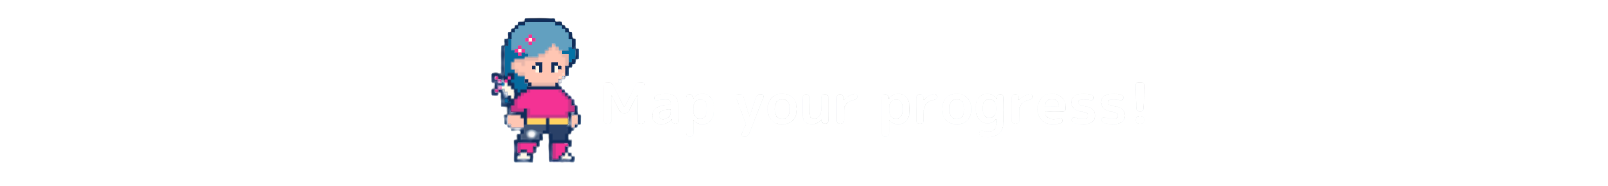

**প্রতিটি হেড থেকে আউটপুট গুলো মিশ্রিত করার জন্য লিনিয়ার লেয়ার**

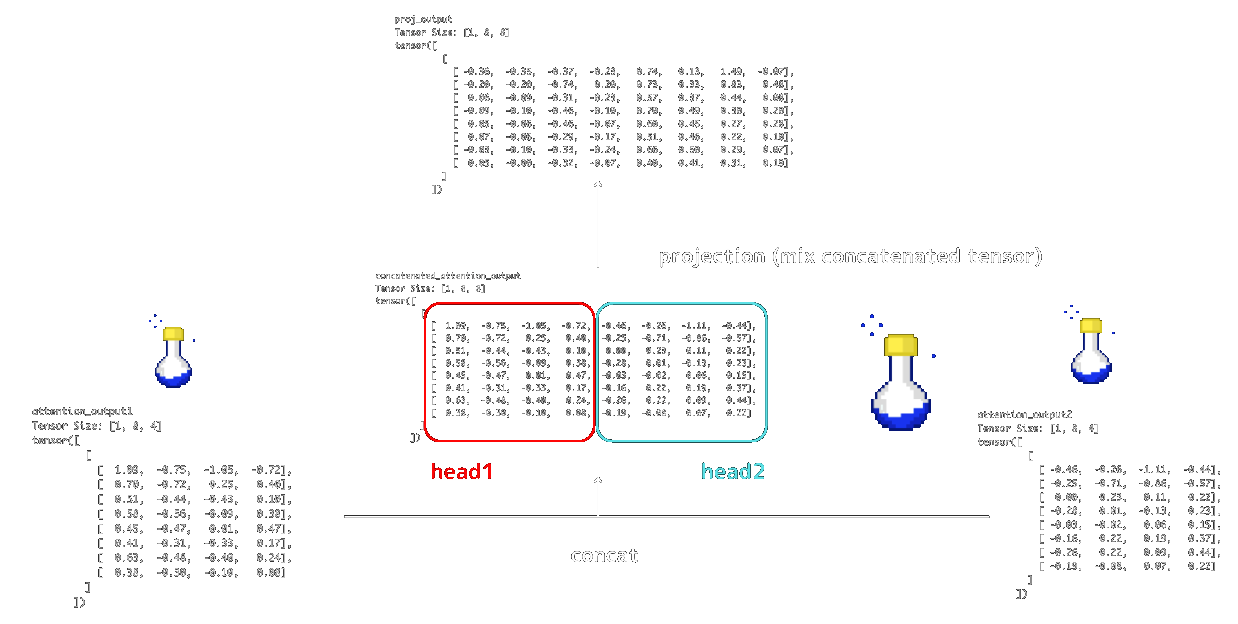

1. **প্রত্যেকে আলাদা মাথা তাদের নিজস্ব আউটপুট তৈরি করে**

   * আপনি দুটি মাথার জন্য দু’বার attention চালান, প্রতিটি একই ৮-টোকেনের সিকোয়েন্সে।
   * প্রতিটি মাথা একটি $[1,\,8,\,4]$ টেনসর তৈরি করে (১ ব্যাচ × ৮ টোকেন × ৪ ফিচার)।

2. **ফিচার অক্ষ বরাবর সংযুক্ত করা**

   * ঐ দুইটি $[1,8,4]$ টেনসর একত্রিত করে একটি $[1,\,8,\,8]$ টেনসর তৈরি করুন।
   * প্রথম ৪ ফিচার আসে মাথা ১ থেকে, পরের ৪ মাথা ২ থেকে।

3. **শেষ লিনিয়ার প্রজেকশন এগুলো “মিশ্রিত” করে**

   * শেষের `nn.Linear(8,8)` লেয়ার এই $[1,8,8]$ টেনসরের প্রতিটি টোকেনে একই ৮×৮ ওজন ম্যাট্রিক্স প্রয়োগ করে।
   * ওই লেয়ার শেখে কিভাবে মাথা ১ ও ২ এর ফিচারকে পুনঃওজন দিয়ে ৮-মাত্রিক একক রূপে যুক্ত করতে হয়।

---

**কেন এভাবে?**

* **বিভিন্ন দৃষ্টিভঙ্গি**: প্রত্যেক মাথা তার নিজের ৪-মাত্রিক সাবস্পেসে সম্পর্ক বিশ্লেষণ করে।
* **পুনর্মিলন**: শেষ লিনিয়ার লেয়ার শেখে কোন মাথার ফিচার কবে বিশ্বাসযোগ্য বা কোন ফিচারগুলো ৮টি আউটপুট ডাইমেনশনে একসাথে মেশানো উচিত।

```python
Instance: projection (৮D থেকে ৮D তে একটি লিনিয়ার ট্রান্সফরমেশন লেয়ার। সেকশনের আগেই সংজ্ঞায়িত।)
Method: forward (ঐচ্ছিক)
Argument: concatenated_attention_output
```

In [ ]:
proj_output = # TODO: উদাহরণ.পদ্ধতি(আর্গুমেন্ট)
print_formatted_tensor("প্রোজ_আউটপুট", proj_output)

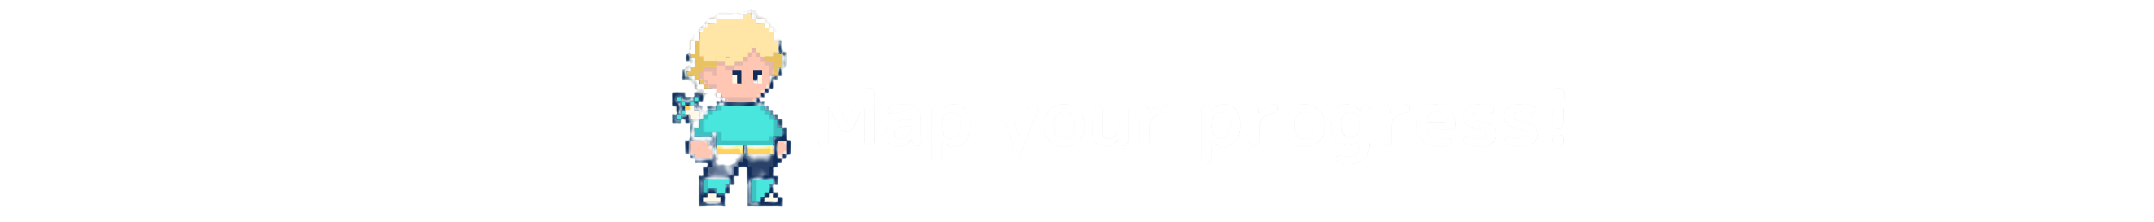

In [ ]:
dropout = DeterministicDropout()
proj_output_dropout = dropout.forward(proj_output)
print_formatted_tensor("প্রজেক্ট_আউটপুট_ড্রপআউট", proj_output_dropout)

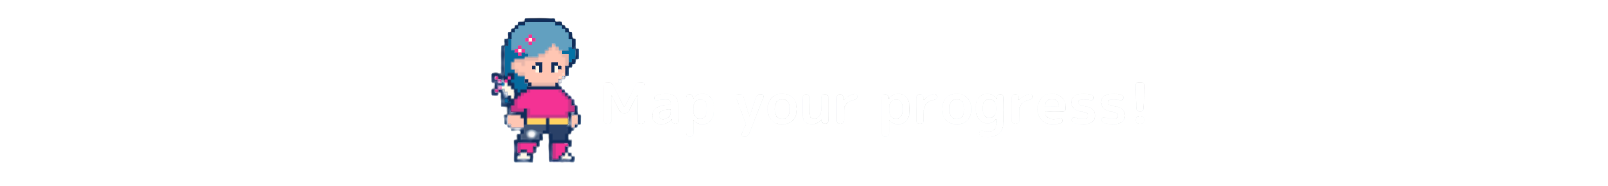

#### **Residual Learning**

*Note:* ResNet আগে দেখে নেওয়া খুবই ভালো হবে।

`proj_output_dropout` হল multi-head attention আউটপুটকে লিনিয়ারভাবে রূপান্তর করার পর dropout প্রয়োগের ফলাফল।<br>

আবার বলি, `attention` হলো বাক্যের টোকেনগুলোর মিশ্রণ যা `query` এর দৃষ্টিকোণ থেকে দেখা হয়েছে।<br>

`proj_output_dropout` মিলে যায় `query1`, `query2` ইত্যাদির সাথে। `query1` আসে `L` থেকে, `query2` আসে `e` থেকে, ও এভাবেই চালিয়ে যায়।<br>

এখানে, আসুন আবার একবার মূল ইনপুট `embeddings` দেখে নেই।<br>
`embeddings` হলো টোকেন অনুসারে এম্বেডিং ভেক্টর, যার সাথে অবস্থানের তথ্য যোগ করা হয়েছে।<br>
প্রত্যেকটি একে অপর থেকে ভিন্ন।<br>

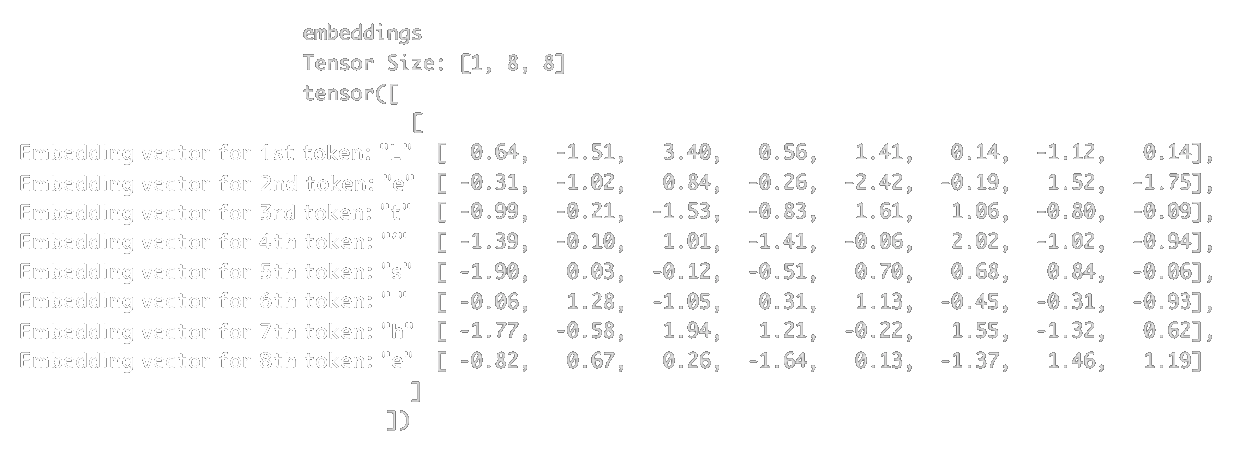

`proj_output_dropout`: প্রতিটি টোকেনের জন্য গতিশীল প্রসঙ্গ তথ্য

`embeddings`: প্রতিটি টোকেনের অনন্য স্থির তথ্য

Attention স্তরের শেষে, `proj_output_dropout`-কে মূল ইনপুট `embeddings`-এর সাথে যোগ করুন।<br>


In [ ]:
multiattention_output = embeddings + proj_output_dropout
print_formatted_tensor("মাল্টিআটেনশন_আউটপুট", multiattention_output)

আগের টোকেনগুলো মিশিয়ে নতুন ভেক্টর যোগ করার মাধ্যমে,<br>
প্রতিটি টোকেনের প্রতিনিধিত্ব একটু একটু করে পরিবর্তিত হয়।<br>

ভাষার মডেলের প্রধান কাজ পরবর্তী টোকেনটি ঠিকঠাক আন্দাজ করা, তাই প্রসঙ্গ যোগ করলে ভবিষ্যদ্বাণীর সঠিকতা বাড়ে।<br>
আর, residual connection গুলো মডেলকে বড় পরিবর্তনের বদলে ছোট ছোট পরিবর্তন শিখতে সাহায্য করে।<br>
আরো জানতে চাইলে ResNet এর ব্যাখ্যা দেখে আসো।

**ModuleList ব্যবহার করে সংক্ষিপ্তভাবে নির্ধারণ করুন**

এ লাইন একসাথে অনেকগুলো head তৈরি করে।

```python
attention_heads = nn.ModuleList([
    AttentionHead(head_size=head_size, config=config)
    for _ in range(num_attention_heads)
])
```

* `num_attention_heads` বার লুপ চালাও।
* প্রতিবার `AttentionHead(...)` মডিউল তৈরি করো।
  (এটি Q/K/V প্রজেকশন এবং attention সামলায়।)
* এগুলো `ModuleList`-এ জমা রাখো।

এখন, `attention_heads[i]` i-থ head এর attention চালায়।  
এভাবে একই সঙ্গে অনেক head তৈরি হয় parallel প্রসেসিং এর জন্য।


In [ ]:
config = ModelConfig()
num_attention_heads = 2
head_size = int(config.embedding_dim / num_attention_heads)

attention_heads = # TODO: উপরেরটি টাইপ করুন।

In [ ]:
print("মনোযোগ_হেডগুলি", attention_heads)

In [ ]:
print("attention_heads[0]", attention_heads[0])

In [ ]:
print("attention_heads[1]", attention_heads[1])

```python
head_outputs_list = [head.forward(norm_embeddings) for head in attention_heads]
```
`norm_embeddings` (সাধারণীকৃত এমবেডিং) প্রতিটি `head`-এর মধ্যে প্রবেশ করান attention_heads-এর।  
আউটপুটগুলো একটি তালিকায় জমা করুন।

আউটপুট দেখতে এমন হবে: `[head1(norm_embeddings), head2(norm_embeddings)]`।


In [ ]:
torch.manual_seed(1337)
config = ModelConfig()
# EmbeddingModule একটি ইনস্ট্যান্স তৈরি করা হচ্ছে।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
layer_norm = nn.LayerNorm(config.embedding_dim)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])
sample_embeddings = embedding_module.forward(sample_input_tokens)
norm_embeddings = layer_norm(sample_embeddings)
attention_heads = nn.ModuleList([AttentionHead(head_size = head_size, config = config) for _ in range(num_attention_heads)])
head_outputs_list = # TODO: সব হেড norm_embeddings-এ প্রয়োগ করুন
print("head_outputs_list", head_outputs_list)

```python
Function: torch.cat
Arguments: head_outputs_list, dim = THINK_FOR_YOURSELF
```

In [ ]:
concatenated_attention_output = # TODO: ফাংশন (আর্গুমেন্ট)
print_formatted_tensor("সংযুক্ত_অ্যাটেনশন_আউটপুট", concatenated_attention_output)

**`Check Point`** <label><input type="checkbox"> ← উপরের ফলাফল নিচের উত্তরের সাথে মিললে এই বক্সে টিক দিন<label>

```
concatenated_attention_output
Tensor Size: [1, 8, 8]
tensor([
         [
           [  1.09,  -0.75,  -1.05,  -0.72,  -0.46,  -0.26,  -1.11,  -0.44],
           [  0.70,  -0.72,   0.25,   0.40,  -0.25,  -0.71,  -0.86,  -0.57],
           [  0.51,  -0.44,  -0.43,   0.10,   0.00,   0.23,   0.11,   0.22],
           [  0.58,  -0.56,  -0.09,   0.38,  -0.28,   0.01,  -0.13,   0.23],
           [  0.45,  -0.47,   0.01,   0.47,  -0.03,  -0.02,   0.06,   0.15],
           [  0.41,  -0.31,  -0.33,   0.17,  -0.16,   0.22,   0.19,   0.37],
           [  0.63,  -0.48,  -0.40,   0.24,  -0.26,   0.22,   0.09,   0.44],
           [  0.38,  -0.30,  -0.10,   0.08,  -0.19,  -0.08,   0.07,   0.22]
         ]
       ])
```

**Chapter 7: MultiHeadAttention Class: Section 2: forward** <label><input type="checkbox"> Mark as done</label>

### Section 3: একটি ক্লাস ডিফাইন করা

🔘 **Options**: এমন কিছু অতিরিক্ত অপশন থাকতে পারে যা আপনার দরকার নেই।

`torch.cat`　　`self.embedding_dim`　　`nn.ModuleList`　　`forward`　　`nn.Linear`　　`torch.ones`　　`self.num_attention_heads`　　`self.head_size`　　`input_tensor`

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.num_attention_heads = config.num_attention_heads
        self.embedding_dim = config.embedding_dim
        self.head_size = int(________________ / ____________________)

        # একাধিক হেড ModuleList দিয়ে পরিচালনা করুন
        self.attention_heads = nn.ModuleList([
            AttentionHead(__________, config)
            for _ in range(____________________)
        ])

        # প্রতিটি হেডের আউটপুট মিশ্রণের জন্য লিনিয়ার লেয়ার
        self.output_projection = nn.Linear(________________, ________________)

        # আউটপুটের জন্য ড্রপআউট
        self.dropout = DeterministicDropout(config.dropout_rate)

    def forward(self, input_tensor):
        # প্রত্যেক হেড থেকে আউটপুট নিন
        # (B, T, head_size) এর তালিকা
        head_outputs_list = [head.forward(___________) for head in self.attention_heads]

        # সব হেডের আউটপুট যুক্ত করুন → (B, T, embedding_dim)
        concatenated = ___________(head_outputs_list, dim=-1)

        # আউটপুটগুলোর লিনিয়ার রূপান্তর মিশ্রণ করা
        projected = self.output_projection.forward(concatenated)

        # চূড়ান্ত আউটপুটে ড্রপআউট প্রয়োগ করুন
        output = self.dropout.forward(projected)

        return output

<details>
<summary>উত্তর দেখাতে/লুকাতে এখানে ক্লিক করুন</summary>

```python
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.num_attention_heads = config.num_attention_heads
        self.embedding_dim = config.embedding_dim
        self.head_size = int(self.embedding_dim / self.num_attention_heads)

        # ModuleList দিয়ে একাধিক হেড পরিচালনা করা
        self.attention_heads = nn.ModuleList([
            AttentionHead(self.head_size, config)
            for _ in range(self.num_attention_heads)
        ])

        # প্রতিটি হেডের আউটপুট মিশ্রনের জন্য লিনিয়ার লেয়ার
        self.output_projection = nn.Linear(self.embedding_dim, self.embedding_dim)

        # আউটপুটের জন্য ড্রপআউট
        self.dropout = DeterministicDropout(config.dropout_rate)

    def forward(self, input_tensor):
        # প্রতিটি হেড থেকে আউটপুট নিন
        # (B, T, head_size) আকারের লিস্ট
        head_outputs_list = [head.forward(input_tensor) for head in self.attention_heads]

        # সব হেডের আউটপুটগুলো একসাথে জোড়া দিন → (B, T, embedding_dim)
        concatenated = torch.cat(head_outputs_list, dim=-1)

        # লিনিয়ার ট্রান্সফরমেশনের মাধ্যমে আউটপুট মিশ্রণ
        projected = self.output_projection.forward(concatenated)

        # চূড়ান্ত আউটপুটে ড্রপআউট প্রয়োগ
        output = self.dropout.forward(projected)

        return output
```
</details>

In [ ]:
# মডেল সেটিং সংরক্ষণকারী কনফিগারেশন ক্লাস
class ModelConfig:
    batch_size = 1  # একবারে প্রক্রিয়াজাত করার ডেটার সংখ্যা (ব্যাচ সাইজ)
    input_sequence_length = 8  # ইনপুট ডেটার দৈর্ঘ্য (সিকোয়েন্স দৈর্ঘ্য)
    embedding_dim = 8  # এম্বেডেড লেয়ারের আকার (ফিচার ভেক্টরের মাত্রার সংখ্যা)
    num_attention_heads = 2  # নোট মেকানিজম হেড নম্বর
    dropout_rate = 0.1  # ড্রপআউট সম্ভাবনা

# আপনার সেটিংস যাচাই করুন
config = ModelConfig()

In [ ]:
torch.manual_seed(1337)

# একটি ModelConfig ইনস্ট্যান্স তৈরি করা হচ্ছে। কোনো কনফিগারেশন প্যারামিটার নেই (কনস্ট্রাক্টর)।
config = ModelConfig()

# EmbeddingModule একটি ইনস্ট্যান্স তৈরি হচ্ছে।
embedding_module = EmbeddingModule(vocab_size = 65, config = config)
layer_norm = nn.LayerNorm(config.embedding_dim)

# আপনি যেই MultiHeadAttention ক্লাসটি তৈরি করেছেন তা ব্যবহার করি।
# প্রথম `config` হল `__init__` প্যারামিটার নাম।
# দ্বিতীয় `config` হল `config = ModelConfig()` দিয়ে তৈরি ইনস্ট্যান্স।
multiheadattention = # TODO: ClassName(config=config)

# Let's he এর সাথে সামঞ্জস্যপূর্ণ। (ব্যাচ সাইজ, টোকেন দৈর্ঘ্য) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

embeddings = embedding_module.forward(sample_input_tokens)
norm_embeddings = layer_norm(embeddings)
multihead_attention_output = # TODO: উদাহরণ.মেথড(আর্গুমেন্ট)
print_formatted_tensor("মাল্টিহেড অ্যাটেনশন আউটপুট", multihead_attention_output)

**`Check Point`** <label><input type="checkbox"> ← উপরের রেজাল্ট নিচের উত্তরের সঙ্গে মিললে এই বক্স চেক করুন<label>

```
multihead_attention_output
Tensor Size: [1, 8, 8]
tensor([
         [
           [ -0.40,  -0.38,  -0.41,  -0.26,   0.82,   0.00,   1.66,  -0.08],
           [ -0.23,  -0.22,  -0.82,   0.23,   0.81,   0.37,   0.92,   0.53],
           [  0.06,  -0.10,  -0.35,  -0.26,   0.64,   0.41,   0.49,   0.09],
           [ -0.10,  -0.11,  -0.52,  -0.12,   0.78,   0.54,   0.33,   0.00],
           [  0.06,  -0.07,  -0.51,  -0.00,   0.67,   0.50,   0.00,   0.31],
           [  0.08,  -0.00,  -0.00,  -0.19,   0.57,   0.51,   0.25,   0.11],
           [ -0.04,  -0.11,  -0.36,  -0.27,   0.73,   0.56,   0.32,   0.08],
           [  0.05,  -0.00,  -0.00,  -0.08,   0.45,   0.45,   0.35,   0.22]
         ]
       ])
```

**Residual Learning**

In [ ]:
residual_connection_output = multihead_attention_output + embeddings
print_formatted_tensor("অবশিষ্ট সংযোগ আউটপুট", residual_connection_output)

**`Check Point`** <label><input type="checkbox"> ← এই বাক্সে চেক দিন যদি উপরের ফলাফল নিচের উত্তরটির সাথে মিলে যায়<label>

```
residual_connection_output
টেনসরের আকার: [1, 8, 8]
tensor([
         [
           [  0.24,  -1.89,   2.99,   0.30,   2.23,   0.14,   0.54,   0.06],
           [ -0.53,  -1.24,   0.02,  -0.04,  -1.61,   0.18,   2.44,  -1.22],
           [ -0.93,  -0.31,  -1.88,  -1.09,   2.24,   1.47,  -0.31,  -0.01],
           [ -1.49,  -0.21,   0.49,  -1.53,   0.71,   2.56,  -0.69,  -0.94],
           [ -1.84,  -0.04,  -0.63,  -0.51,   1.37,   1.18,   0.84,   0.25],
           [  0.02,   1.28,  -1.05,   0.12,   1.70,   0.06,  -0.07,  -0.82],
           [ -1.81,  -0.69,   1.57,   0.94,   0.51,   2.11,  -1.00,   0.70],
           [ -0.76,   0.66,   0.26,  -1.71,   0.57,  -0.92,   1.81,   1.40]
         ]
       ])
```

**Chapter 7: MultiHeadAttention Class: Section 3: ক্লাস সংজ্ঞায়িত করা** <label><input type="checkbox"> Mark as Done</label>

**Chapter 7: MultiHeadAttention Class** <label><input type="checkbox"> Mark as Done</label>